In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [87]:
dataset = pd.read_csv("tmdb_5000_movies.csv")
df = pd.DataFrame(dataset)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [88]:
x = df.iloc[0]

In [89]:
print(x['genres'],end="\n\n")
print(x['keywords'])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]

[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]


In [90]:
j = json.loads(x['genres'])
final_string = ""
for pair in j:
    final_string+=pair['name'] + " "
print(final_string)

Action Adventure Fantasy Science Fiction 


In [91]:
def genres_and_keywords_to_string(row):
  genres = json.loads(row['genres'])
  genres = ' '.join(''.join(j['name'].split()) for j in genres)

  keywords = json.loads(row['keywords'])
  keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
  return "%s %s" % (genres, keywords)

In [92]:
df['string'] = df.apply(genres_and_keywrods_to_string,axis=1)

In [93]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['string'])

In [94]:
movie2idx = {movie:idx for (movie,idx) in zip(df['title'],df.index)}

In [95]:
idx = movie2idx['Scream 2']

In [96]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [97]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [98]:
# computing the similarity score betwwen the query and every other movie 
scores = cosine_similarity(query,X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [99]:
scores = scores.flatten()

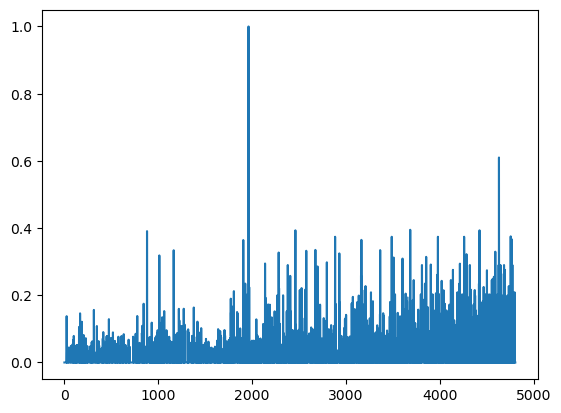

In [100]:
plt.plot(scores)

In [101]:
# returns the indices of the sorted(descending) array.
(-scores).argsort()

array([1961, 4628, 3683, ..., 1712, 1691, 4802], dtype=int64)

In [102]:
recommended_idx = (-scores).argsort()[1:6]

In [103]:
df['title'].iloc[recommended_idx]

4628                   Graduation Day
3683    The Texas Chainsaw Massacre 2
2460                       The Unborn
4421                    Truth or Dare
880                        Grindhouse
Name: title, dtype: object

In [104]:
# create a function that generates recommendations
def recommend(title):
  # get the row in the dataframe for this movie
  idx = movie2idx[title]
  # calculate the pairwise similarities for this movie
  query = X[idx]
  scores = cosine_similarity(query, X)

  # currently the array is 1 x N, make it just a 1-D array
  scores = scores.flatten()

  # get the indexes of the highest scoring movies
  # get the first K recommendations
  # don't return itself!
  recommended_idx = (-scores).argsort()[1:6]

  # return the titles of the recommendations
  return df['title'].iloc[recommended_idx]

In [105]:
print("Recommendations for 'Mortal Kombat':")
print(recommend('Mortal Kombat'))

Recommendations for 'Mortal Kombat':
1611    Mortal Kombat: Annihilation
657      Resident Evil: Retribution
854                        Æon Flux
253          300: Rise of an Empire
3856    In the Name of the King III
Name: title, dtype: object
